In [8]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
class Adaline: 
    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs
    
    def net_input(self, X):
        w_0 = self.weights[0]
        w_inputs = np.dot(X, self.weights[1:])
        n_inputs = w_0 + w_inputs
        return n_inputs
    
    def activation(self, n_input):
        return n_input
    
    def update(self, X, y, n_input):
        errors = y - n_input
        delta_weights = self.eta * X.T.dot(errors)
        self.weights[1:] = self.weights[1:] + delta_weights
        self.weights[0]  = self.weights[0] + self.eta * errors.sum()
        cost = np.sum(errors ** 2) / 2
        return cost
        
    def fit(self, X, y):
        costs = []
        self.weights = np.random.normal(loc = 0.1, scale = 0.1, size = X.shape[1] + 1)
        print self.weights
        for _ in range(self.epochs):
            n_inputs = self.net_input(X)
            a_inputs = self.activation(n_inputs)
            cost = self.update(X, y, a_inputs)
            costs.append(cost)
        return costs
            
    def predict(self, x):
        n_input = self.net_input(x)
        a_input = self.activation(n_input)
        y_ = np.where(a_input >= 0.0, 1 , -1 )
        return y_

In [81]:
iris = pd.read_csv("iris.data", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

In [82]:
iris.label.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64

In [83]:
y = iris.iloc[0:100, 4].values

In [84]:
y = np.where(y == "Iris-setosa",-1, 1)

In [85]:
X = iris.iloc[0:100, [0,2]].values

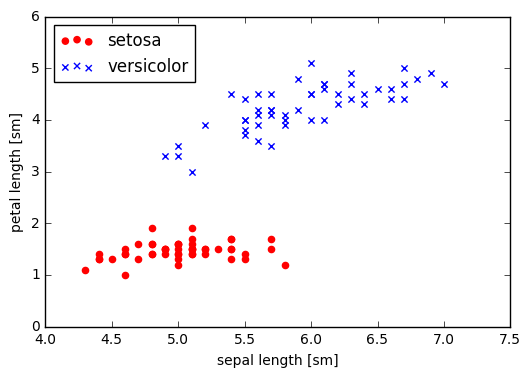

In [86]:
plt.scatter(X[:50, 0], X[:50, 1], marker = 'o', color = "red", label = "setosa")
plt.scatter(X[50:, 0], X[50:, 1], marker = "x", color = "blue", label = "versicolor")
plt.xlabel("sepal length [sm]")
plt.ylabel("petal length [sm]")
plt.legend(loc = 'upper left')
plt.show()

In [87]:
a = Adaline(0.01, 10)

In [110]:
ada1 = Adaline(0.01, 20)
cost_01 = ada1.fit(X, y)
ada2 = Adaline(0.0001, 20)
cost_001 = ada2.fit(X, y)

[ 0.20037813  0.08539602  0.2931597 ]
[ 0.03882415  0.182594    0.19622728]


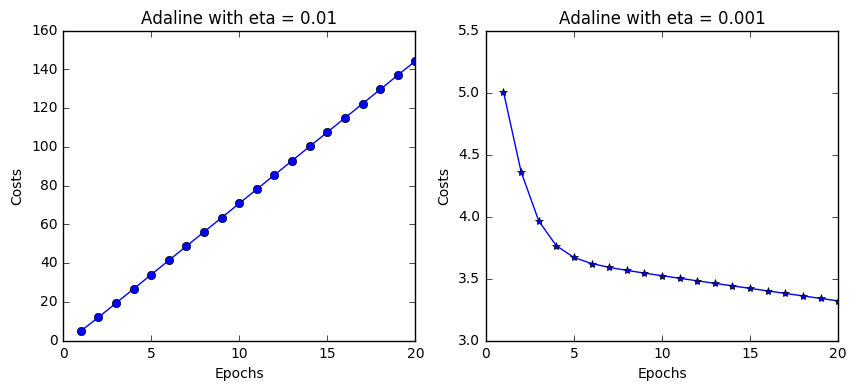

In [111]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 4))
axes[0].plot(range(1, len(cost_01) + 1), np.log(cost_01), marker = "o")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Costs")
axes[0].set_title("Adaline with eta = 0.01")

axes[1].plot(range(1, len(cost_001) + 1), np.log(cost_001), marker = "*")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Costs")
axes[1].set_title("Adaline with eta = 0.001")

In [115]:
# feature scaling
X_std = np.zeros_like(X)
for i in range(X.shape[1]):
    col = X[:, i]
    X_std[:, i] = (col - col.mean()) / col.std()

In [127]:
ada4 = Adaline(0.01, 20)
costs_01_std = ada4.fit(X_std, y)
ada5 = Adaline(0.001, 20)
costs_001_std = ada5.fit(X_std, y)

[ 0.20477155  0.08298654  0.16674692]
[-0.00476581 -0.0287056  -0.00810798]


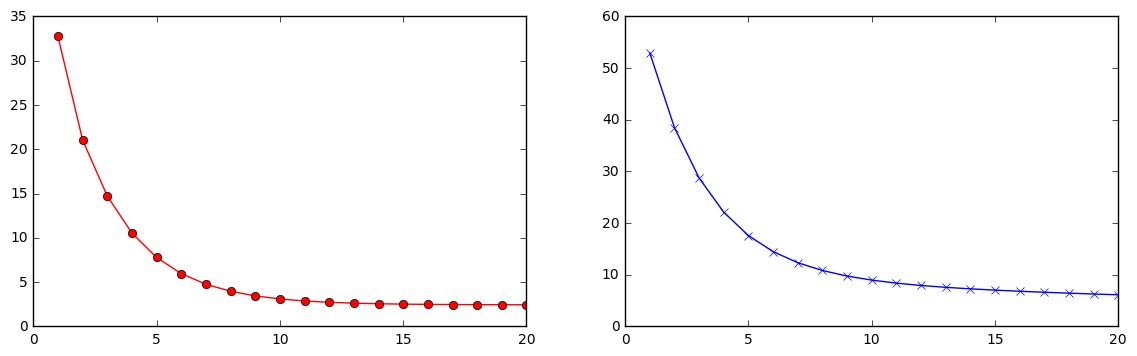

In [128]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 4))
axes[0].plot(range(1, len(costs_01_std) + 1), costs_01_std, marker = "o", color = "red")
axes[1].plot(range(1, len(costs_001_std) + 1), costs_001_std, marker = "x", color = "blue")